# Entrega 2 Analisis de bases de Datos

Lo que se quiere hacer inicialmente es un analisis y reduccion de dimension de la base de datos de Matriculados.  
Así que primero caractericemos esta base: 

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
matriculados = pd.read_csv("/home/willgm/STUFF/UNAL/7sem/Analisis BBDD/Proyecto-ABD-2024-2/Estudiantes_matriculados.csv")

## Caracterizacion de la Base de Datos Original de Matriculados

Los 44 atributos de la base son los siguientes y corresponden a la siguiente informacion:

+ **YEAR:**  
+ **SEMESTRE:**  
+ **TIPO_NIVEL:**          
+ **NIVEL:**  
+ **DEP_NAC:**  
+ **COD_DEP_NAC:**  
+ **CIU_NAC:**  
+ **COD_CIU_NAC:**  
+ **LON_CIU_NAC:**  
+ **LAT_CIU_NAC:**  
+ **DEP_PROC:**  
+ **COD_DEP_PROC:**  
+ **CIU_PROC:**  
+ **COD_CIU_PROC:**  
+ **LON_CIU_PROC:**  
+ **LAT_CIU_PROC:**  
+ **CODS_NAC:**  
+ **CODN_NAC:**  
+ **NACIONALIDAD:**  
+ **EDAD:**  
+ **SEXO:**  
+ **ESTRATO:**  
+ **TIPO_COL:**  
+ **PBM:**  
+ **MAT_PVEZ:**  
+ **SNIES_SEDE_ADM:**  
+ **SEDE_NOMBRE_ADM:**  
+ **SNIES_SEDE_MAT:**  
+ **SEDE_NOMBRE_MAT:**  
+ **ADM_PEAMA_ANDINA**  
+ **MOD_ADM:**  
+ **TIPO_ADM:**  
+ **PAES:**  
+ **PEAMA:**  
+ **MOV_PEAMA:**  
+ **CONVENIO:**  
+ **TIP_CONVENIO:**  
+ **FACULTAD:**  
+ **SNIES_PROGRA:**  
+ **PROGRAMA:**  
+ **AREAC_SNIES:**  
+ **CA_CINE:**  
+ **CD_CINE:**  
+ **AREA_CINE:**  

Estos atributos pueden agruparse de la siguiente manera:  

+ ***NIVEL:*** En esta categoria corresponden *TIPO_NIVEL* y *Nivel*. Pues la primera solo indica que si el estudiante pertenece a pregrado o postgrado,
  la segunda hace lo mismo pero tiene ademas como posibles datos 'Maestria'.'Especializacion','Doctorado','Especializaciones medicas' y 'Pregrado' .  
  Con lo cual podemos tomar unicamente *Nivel*, pues si un estudiante no esta haciendo pregrado y tiene otro Nivel es porque esta haciendo postgrado.  
  Dicho de otra manera, 'NIVEL' determina a 'TIPO_NIVEL'

In [3]:
matriculados['TIPO_NIVEL'].unique()

array(['Pregrado', 'Postgrado'], dtype=object)

In [4]:
matriculados['NIVEL'].unique()

array(['Pregrado', 'Maestría', 'Especialidades médicas',
       'Especialización', 'Doctorado'], dtype=object)

+ ***DEPARTAMENTO DE NACIMIENTO:*** A Esta categoria pertenecen *DEP_NAC* y *COD_DEP_NAC*, pues ambos se determinan entre sí, sabiendo el codigo se puede saber el departemento y viceversa.  

In [12]:
matriculados["DEP_NAC"].unique()

array(['BOGOTÁ, D. C.', 'CUNDINAMARCA', 'META', 'Sin información',
       'HUILA', 'CALDAS', 'GUAINÍA', 'NARIÑO', 'BOYACÁ', 'TOLIMA',
       'SANTANDER', 'NORTE DE SANTANDER', 'PUTUMAYO', 'BOLÍVAR',
       'VALLE DEL CAUCA', 'ARAUCA', 'GUAVIARE', 'CASANARE', 'QUINDÍO',
       'ANTIOQUIA', 'VICHADA', 'CAQUETÁ', 'ATLÁNTICO', 'CESAR',
       'AMAZONAS', 'CAUCA',
       'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA',
       'MAGDALENA', 'LA GUAJIRA', 'RISARALDA', 'CÓRDOBA', 'SUCRE',
       'VAUPÉS', 'CHOCÓ'], dtype=object)

In [11]:
matriculados["COD_DEP_NAC"].unique()

array([ 11,  25,  50, -89,  41,  17,  94,  52,  15,  73,  68,  54,  86,
        13,  76,  81,  95,  85,  63,   5,  99,  18,   8,  20,  91,  19,
        88,  47,  44,  66,  23,  70,  97,  27])

+ ***MUNICIPIO*** A esta categoria pertenece *CIU_NAC*, *COD_CIU_NAC*, *LON_CIU_NAC* y *LAT_CIU_NAC*. Si se conoce el municipio del que proviene un estudiantes se conoce un codigo y su latidu y longitud. 

In [13]:
matriculados["CIU_NAC"].unique()

array(['BOGOTÁ, D.C.', 'FACATATIVÁ', 'VILLAVICENCIO', 'Sin información',
       'NEIVA', 'MANIZALES', 'INÍRIDA', 'IPIALES', 'DUITAMA', 'IBAGUÉ',
       'CHÍA', 'UBALÁ', 'MANZANARES', 'SOATÁ', 'TUNJA', 'ARMERO GUAYABAL',
       'GIRARDOT', 'ALDANA', 'BUCARAMANGA', 'CÚCUTA', 'COLÓN', 'PITALITO',
       'SOGAMOSO', 'VILLA DE SAN DIEGO DE UBATÉ', 'ACACÍAS', 'GACHETÁ',
       'SANTA ROSA DEL SUR', 'SUCRE', 'SOACHA', 'CALI', 'PASTO',
       'PALMIRA', 'CHOACHÍ', 'COLOMBIA', 'MARQUETALIA',
       'SAN PABLO DE BORBUR', 'ARAUCA', 'TASCO', 'CHAPARRAL',
       'SAN JOSÉ DEL GUAVIARE', 'SAN FRANCISCO', 'ZIPAQUIRÁ', 'PAIPA',
       'CHIQUINQUIRÁ', 'YOPAL', 'AQUITANIA', 'ARMENIA', 'MEDELLÍN',
       'LA VEGA', 'COTA', 'PUERTO CARREÑO', 'FLORENCIA', 'GUADUAS',
       'BARRANQUILLA', 'GIGANTE', 'MALLAMA', 'CAUCASIA',
       'CARTAGENA DE INDIAS', 'VALLEDUPAR', 'LETICIA', 'ARBELÁEZ',
       'SUSACÓN', 'MADRID', 'TARQUI', 'ALGECIRAS', 'VILLETA',
       'FUSAGASUGÁ', 'SUBACHOQUE', 'AGUAZUL', 'VILLA DE L

In [14]:
matriculados["COD_CIU_NAC"].unique()

array([11001, 25269, 50001, ..., 25258, 54261, 15696])

In [15]:
matriculados["LON_CIU_NAC"].unique()

array([-74.11391872, -74.35101469, -73.6268779 , ..., -74.29016259,
       -72.60393412, -73.60418204])

In [16]:
matriculados["LAT_CIU_NAC"].unique()

array([4.62457505, 4.81224201, 4.12295758, ..., 5.24908341, 7.9370731 ,
       5.71227372])

+ ***DEPARTAMENTO PROCEDIMIENTO***  

In [17]:
matriculados["DEP_PROC"].unique()

array(['BOGOTÁ, D. C.', 'CUNDINAMARCA', 'META', 'HUILA',
       'Sin información', 'NARIÑO', 'BOYACÁ', 'TOLIMA', 'CALDAS',
       'VALLE DEL CAUCA', 'NORTE DE SANTANDER', 'PUTUMAYO', 'BOLÍVAR',
       'SANTANDER', 'CASANARE', 'GUAVIARE', 'ATLÁNTICO', 'ARAUCA',
       'CAQUETÁ', 'AMAZONAS', 'SUCRE',
       'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA',
       'QUINDÍO', 'CESAR', 'MAGDALENA', 'LA GUAJIRA', 'CÓRDOBA', 'CAUCA',
       'ANTIOQUIA', 'RISARALDA', 'VAUPÉS', 'VICHADA', 'GUAINÍA', 'CHOCÓ'],
      dtype=object)

In [18]:
matriculados["COD_DEP_PROC"].unique()

array([ 11,  25,  50,  41, -89,  52,  15,  73,  17,  76,  54,  86,  13,
        68,  85,  95,   8,  81,  18,  91,  70,  88,  63,  20,  47,  44,
        23,  19,   5,  66,  97,  99,  94,  27])

+ ***MUNICIPIO PROCEDIMIENTO***  

In [23]:
matriculados["CIU_PROC"].unique()

array(['BOGOTÁ, D.C.', 'FACATATIVÁ', 'VILLAVICENCIO', 'NEIVA',
       'Sin información', 'IPIALES', 'DUITAMA', 'IBAGUÉ',
       'VILLA DE LEYVA', 'CHÍA', 'UBALÁ', 'SOACHA', 'MARQUETALIA',
       'TOCANCIPÁ', 'TUNJA', 'CAMPOHERMOSO', 'MOSQUERA', 'CAJICÁ',
       'ALDANA', 'CALI', 'CÚCUTA', 'COLÓN', 'PITALITO', 'SOGAMOSO',
       'ORITO', 'SANTA ROSA DEL SUR', 'SUCRE', 'TABIO', 'PASTO',
       'PUENTE NACIONAL', 'MONTERREY', 'RÁQUIRA', 'YOPAL', 'CHAPARRAL',
       'SAN MARTÍN', 'SAN JOSÉ DEL GUAVIARE', 'VALLE DEL GUAMUEZ',
       'ZIPAQUIRÁ', 'PAIPA', 'COTA', 'BARRANQUILLA', 'GUASCA', 'ARAUCA',
       'AQUITANIA', 'NOCAIMA', 'FLORENCIA', 'GIGANTE', 'FUNZA', 'MALLAMA',
       'LETICIA', 'SUSACÓN', 'SAN MARCOS', 'MADRID', 'TARQUI', 'SAN LUIS',
       'CARMEN DE APICALÁ', 'CANTAGALLO', 'SUBACHOQUE', 'PAMPLONA',
       'PALERMO', 'SAN ANDRÉS DE TUMACO', 'SIBATÉ', 'CHINAVITA',
       'BUCARAMANGA', 'MÁLAGA', 'SIBUNDOY', 'VERGARA', 'LA ARGENTINA',
       'CONTADERO', 'SAN ANDRÉS', 'MANIZALES',

In [24]:
matriculados["COD_CIU_PROC"].unique()

array([11001, 25269, 50001, 41001,   -89, 52356, 15238, 73001, 15407,
       25175, 25839, 25754, 17444, 25817, 15001, 15135, 25473, 25126,
       52022, 76001, 54001, 86219, 41551, 15759, 86320, 13688, 68773,
       25785, 52001, 68572, 85162, 15600, 85001, 73168, 50689, 95001,
       86865, 25899, 15516, 25214,  8001, 25322, 81001, 15047, 25491,
       18001, 41306, 25286, 52435, 91001, 15774, 70708, 25430, 41791,
       73678, 73148, 13160, 25769, 54518, 41524, 52835, 25740, 15172,
       68001, 68432, 86749, 25862, 41378, 52210, 88001, 17001, 25295,
       25843, 52323, 52320, 15097, 68077, 68276, 25290, 25151, 25799,
       68397, 25718, 73411, 73319, 25873, 15272, 63302, 20045, 15804,
       47555, 25758, 13001, 13430, 44430, 25099, 25053, 86885, 41396,
       25200, 68861, 23417, 13873, 70001, 23001, 47245, 76109, 19212,
       81794, 15837, 52838, 17380,  5001, 54498, 17614, 19001, 23555,
       68425, 63001, 25279, 25307, 76520,  5308, 85015, 20011, 52540,
       25658, 25181,

In [25]:
matriculados["LON_CIU_PROC"].unique()

array([-74.11391872, -74.35101469, -73.6268779 , -75.27794587,
       -89.        , -77.64609566, -73.03026863, -75.19635015,
       -73.52644551, -74.04964819, -73.53230677, -74.19490154,
       -75.04785397, -73.91174581, -73.35436382, -73.10351821,
       -74.22826847, -74.02363653, -77.70037482, -76.5263912 ,
       -72.50559097, -76.96898003, -76.04040041, -72.9232369 ,
       -76.88020986, -74.05144607, -73.79149045, -74.09847546,
       -77.27826745, -73.67750975, -72.88909564, -73.63228856,
       -72.39379053, -75.48358221, -73.69597218, -72.640096  ,
       -76.90503951, -73.99240307, -73.11674378, -74.10293364,
       -74.81878809, -73.87806905, -70.76277305, -72.88435052,
       -74.37747361, -75.60799327, -75.54572948, -74.2019794 ,
       -77.86465833, -69.94067983, -72.68978803, -75.13902232,
       -74.26675545, -75.8267662 , -75.09587039, -74.72333124,
       -73.92442804, -74.17223596, -72.64821106, -75.43278509,
       -78.78940097, -74.25874939, -73.36862894, -73.13

In [26]:
matriculados["LAT_CIU_PROC"].unique()

array([  4.62457505,   4.81224201,   4.12295758,   2.93554559,
       -89.        ,   0.82903172,   5.81936914,   4.43963073,
         5.63623796,   4.86580207,   4.74817719,   4.58639002,
         5.2986509 ,   4.96514275,   5.53937064,   5.03063005,
         4.71430463,   4.92087291,   0.8822436 ,   3.40638218,
         7.90526712,   1.19200058,   1.85414505,   5.72486205,
         0.67602048,   7.9631911 ,   5.91903258,   4.91641735,
         1.2128086 ,   5.87819149,   4.87941197,   5.53873794,
         5.33249118,   3.72576111,   3.70161053,   2.5704781 ,
         0.42390514,   5.02348294,   5.7804891 ,   4.80870097,
        10.97964939,   4.86754875,   7.0777365 ,   5.51831039,
         5.06941561,   1.61582908,   2.38783134,   4.70865654,
         1.14084162,  -4.21202317,   6.23077474,   8.66403585,
         4.7328452 ,   2.10954162,   4.13388115,   4.14664309,
         7.37289896,   4.928374  ,   7.37519415,   2.88665882,
         1.75029972,   4.48787134,   5.16741663,   7.12

+ ***NACIONALIDAD***

In [7]:
print(len(matriculados["CODN_NAC"].unique()))
matriculados["CODS_NAC"].unique()

50


array(['COL', 'BRA', 'Sin información', 'ECU', 'VEN', 'FRA', 'PER', 'PRK',
       'NLD', 'CUB', 'ESP', 'CHE', 'DEU', 'ARG', 'PAN', 'MEX', 'CMR',
       'PRY', 'USA', 'JPN', 'BOL', 'SYR', 'TUR', 'CRI', 'COD', 'NOR',
       'PRI', 'CAN', 'ITA', 'DOM', 'CHN', 'IRN', 'CHL', 'SWE', 'SLV',
       'GTM', 'RUS', 'KOR', 'ISR', 'GBR', 'HND', 'UKR', 'ABW', 'KEN',
       'IND', 'ANT', 'TUN', 'NZL', 'NIC', 'POL'], dtype=object)

In [8]:
print(len(matriculados["CODN_NAC"].unique()))
matriculados["CODN_NAC"].unique()

50


array([170,  76, -89, 218, 862, 250, 604, 408, 528, 192, 724, 756, 276,
        32, 591, 484, 120, 600, 840, 392,  68, 760, 792, 188, 180, 578,
       630, 124, 380, 214, 156, 364, 152, 752, 222, 320, 643, 410, 376,
       826, 340, 804, 533, 404, 356, 530, 788, 554, 558, 616])

In [22]:
matriculados["NACIONALIDAD"].unique()

array(['Colombiana', 'Extranjero', 'Sin información'], dtype=object)

Se puede Reducir a  CODS_NAC o CODS_NAC

+ ***SEDE ADMISION***  

In [28]:
matriculados["SNIES_SEDE_ADM"].unique()

array([1101, 1125, 1124, 1126, 9920, 1102, 1103, 1104, 9933])

In [27]:
matriculados["SEDE_NOMBRE_ADM"].unique()

array(['Bogotá', 'Amazonía', 'Orinoquía', 'Caribe', 'Tumaco', 'Medellín',
       'Manizales', 'Palmira', 'De La Paz'], dtype=object)

+ ***SEDE MATRICULADO***  

In [29]:
matriculados["SNIES_SEDE_MAT"].unique()

array([1101, 1124, 1126, 9920, 1125, 1102, 1103, 1104, 9933])

In [30]:
matriculados["SEDE_NOMBRE_MAT"].unique()

array(['Bogotá', 'Orinoquía', 'Caribe', 'Tumaco', 'Amazonía', 'Medellín',
       'Manizales', 'Palmira', 'De La Paz'], dtype=object)

+ ***TIPO DE ADMISION*** Aqui pertenecen *MOD_ADM* y *TIPO_ADM* , pues si se conoce el tipo de admision (REgular,PAES,Peama,PEAA) se conoce si el modo de admision fuue regular o Especial. 

In [34]:
matriculados["MOD_ADM"].unique()

array(['Regular', 'Especial'], dtype=object)

In [35]:
matriculados["TIPO_ADM"].unique()

array(['Regular', 'PAES', 'PEAMA'], dtype=object)

In [37]:
matriculados["PAES"].unique()

array(['No aplica', 'Comunidades indígenas', 'Mejores bachilleres',
       'Población afrocolombiana',
       'Mejores bachilleres de municipios pobres',
       'Victimas del conflicto armado interno en Colombia', 'De La Paz'],
      dtype=object)

In [36]:
matriculados["PEAMA"].unique()

array(['No aplica', 'PEAMA - Amazonía', 'PEAMA - Orinoquía',
       'PEAMA - Caribe', 'PEAMA - Tumaco',
       'PEAMA - Sede Bogotá - Sumapaz', 'PEAMA - Medellín - Sinifaná',
       'PEAMA - Sede Manizales - Caldas'], dtype=object)

In [38]:
matriculados["MOV_PEAMA"].unique()

array(['No aplica', 'Etapa de movilidad', 'Etapa Inicial'], dtype=object)

In [32]:
matriculados["CONVENIO"].unique()

array(['No aplica', 'No', 'Sí'], dtype=object)

In [33]:
matriculados["TIP_CONVENIO"].unique()

array(['No aplica', 'Externo', 'Interno'], dtype=object)

In [39]:
matriculados["FACULTAD"].unique()

array(['Ingeniería', 'Derecho, ciencias políticas y sociales',
       'Ciencias económicas', 'Ciencias',
       'Medicina veterinaria y de zootecnia', 'Artes', 'Ciencias humanas',
       'Medicina', 'Odontología', 'Ciencias agrarias', 'Enfermería',
       'Arquitectura', 'Minas', 'Ciencias humanas y económicas',
       'Ingeniería y arquitectura', 'Administración',
       'Ciencias exactas y naturales', 'Ciencias agropecuarias',
       'Ingeniería y administración', 'Amazonía', 'Caribe',
       'Escuela de pregrado'], dtype=object)

In [41]:
matriculados["SNIES_PROGRA"].unique()

array([    24,     17,     18,     36,     35,     27,  16940,     25,
       106661,  16941,      3,     29,      6,     14,      9,      5,
           28,     11,  16939, 106654,     31,      1,     15,      8,
        16895,      4,     30,     10,     16,     37,   3140,      2,
           19,      7,   2497,     13,   3103,     32,     20,  19916,
           33,  19910,     96,     12,     34,    106,     55,  19902,
        19907,  19908,  52740,   2605,    103,  52746,  54036, 106338,
          107,   4063,  52728,     48,  91522,     21,     92,     91,
           88,  52741,  16947,  55147,    105,     89,  52747,   3101,
        17906,  52979,  16891, 101794,  16951, 106674,     70,     23,
        16938,  16889,  52980,  55023,  55150,    104,    100,    111,
        53271,  52742,  19904, 106662,  16950,  16890,  19911,   3102,
        52744,  55148,  51674, 106339,     39,    108,     64,  55129,
         3992,  53270, 106671,  19899,  55124,  20487, 106337,  19915,
      

In [46]:
sorted(matriculados["PROGRAMA"].unique())


['Acción Sin Daño y Construcción de Paz',
 'Acción sin daño y construcción de paz',
 'Actuaria y Finanzas',
 'Actuaria y finanzas',
 'Actuaría y Finanzas',
 'Actuaría y finanzas',
 'Administración',
 'Administración Salud Publica',
 'Administración de Empresas',
 'Administración de Empresas (Diurno)',
 'Administración de Empresas (Nocturno)',
 'Administración de Sistemas Informáticos',
 'Administración de empresas',
 'Administración de empresas (diurno)',
 'Administración de empresas (nocturno)',
 'Administración de la Justicia',
 'Administración de sistemas informáticos',
 'Administración salud publica',
 'Agroecología',
 'Alimentación y Nutrición Promoción de la Salud',
 'Alimentación y nutrición promoción de la salud',
 'Alta Gerencia',
 'Alta gerencia',
 'Analítica',
 'Anatomopatología Veterinaria',
 'Anatomopatología veterinaria',
 'Anestesiología y Reanimación',
 'Anestesiología y reanimación',
 'Animación',
 'Antropología',
 'Análisis Espacial',
 'Análisis de Políticas Públicas'

Note que hay varios nombres repetidos, sin embargo corresponden a carreras en diferentes Sedes

In [14]:
matriculados["ADM_PEAMA_ANDINA"].unique() #ESTA VA SOLA

array(['No aplica', 'Bogotá', 'Medellín', 'Manizales', 'Palmira'],
      dtype=object)

In [47]:
matriculados["AREAC_SNIES"].unique()

array(['Ingeniería, arquitectura, urbanismo y afines',
       'Ciencias sociales y humanas',
       'Economía, administración, contaduría y afines',
       'Matemáticas y ciencias naturales',
       'Agronomía, veterinaria y afines', 'Bellas artes',
       'Ciencias de la salud', 'Ciencias de la educación'], dtype=object)

[AREAS SNIES](https://snies.mineducacion.gov.co/portal/DOCUMENTOS/Glosario/)

In [48]:
matriculados["CA_CINE"].unique()

array([8, 4, 3, 5, 7, 6, 2, 9, 1])

In [49]:
matriculados["CD_CINE"].unique()

array([811, 421, 311, 531, 541, 713, 722, 732, 613, 714, 711, 211, 313,
       912, 212, 715, 911, 232, 511, 923, 915, 411, -89, 731, 314, 916,
       312, 841, 413, 913, 213, 222, 542, 223, 929, 533, 532, 588, 231,
       288, 215, 210, 721, 388, 111, 688, 539, 219, 521, 619, 611, 712,
       724, 821, 612, 412, 730])

In [50]:
matriculados["AREA_CINE"].unique()

array(['Agricultura, silvicultura, pesca y veterinaria',
       'Administración de empresas y derecho',
       'Ciencias sociales, periodismo e información',
       'Ciencias naturales, matemáticas y estadística',
       'Ingeniería, industria y construcción',
       'Tecnologías de la información y la comunicación (TIC)',
       'Artes y humanidades', 'Salud y bienestar', 'Educación'],
      dtype=object)

+ ***Categorias Unicas:*** Entre estos se encuentran `Year`,`SEMESTRE`,`EDAD`,`SEXO`,`ESTRATO`,`TIPO_COL`,`PBM`,`MAT_PVEZ`. Pues ninguno se encuentra relacionado con otro atributo

# Limpieza de Datos

## Reduccion de dimensionalidad
Para hacer esto tendremos en cuenta la categorias y los futuros analisis.
Por ejemplo en la categoria departamento de nacimiento unicamente se dejara el atributo de `DEP_NAC` pues ofrece la misma informacion que el codigo.

In [13]:
matriculados_mod = matriculados.copy()

In [15]:
matriculados_mod = matriculados_mod.drop(columns=['COD_DEP_NAC'])

Similarmente dejaremos los atributos `NIVEL`,`CIU_NAC`,`DEP_PROC`,`CIU_PROC`,`CODS_NAC`,`SEDE_NOMBRE_ADM`,`SEDE_NOMBRE_MAT`,`TIPO_ADM`

Como aclaracion extra: Los datos de longitud no se quitan para hacer un pequeño analisis geografico. Por la misma razon tampoco se quitan los datos de `PAES`,`PEAMA`,`MOV_PEAMA`

In [15]:
matriculados_mod = matriculados_mod.drop(columns=['TIPO_NIVEL'])

NameError: name 'matriculados_mod' is not defined

In [16]:
matriculados_mod = matriculados_mod.drop(columns=['COD_CIU_NAC'])

In [17]:
matriculados_mod = matriculados_mod.drop(columns=['COD_DEP_PROC'])

In [18]:
matriculados_mod = matriculados_mod.drop(columns=['COD_CIU_PROC'])

In [19]:
matriculados_mod = matriculados_mod.drop(columns=['CODN_NAC'])

In [20]:
matriculados_mod = matriculados_mod.drop(columns=['SNIES_SEDE_ADM'])

In [21]:
matriculados_mod = matriculados_mod.drop(columns=['SNIES_SEDE_MAT'])

In [22]:
matriculados_mod = matriculados_mod.drop(columns=['MOD_ADM'])

De esta manera fue posible pasar de 44 columnas a 36, es decir que se eliminaron 8 atributos redundantes (o inutiles para el analisis)

## Eliminacion de Datos Extraños

PRIMERO, Para facilitar el analisis y futuras ejecuciones se guardara el dataset modificado como CSV

In [23]:
matriculados_mod.to_csv('Matriculados_mod.csv', index=False)

In [2]:
matriculados = pd.read_csv("Matriculados_mod.csv")

Es mas facil identificar "rarezas" en los datos cuantitivos

### EDAD

In [4]:
matriculados.describe()

,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_PROC,LAT_CIU_PROC,EDAD,PBM,SNIES_PROGRA,CA_CINE,CD_CINE
count,548213.000000,548213.000000,548213.000000,548213.000000,548213.000000,548213.000000,548213.000000,548213.000000,548213.000000,548213.000000,548213.000000
mean,2021.045634,1.509494,-74.870064,3.964206,-74.779452,4.389710,23.498376,13.095669,13894.108544,5.871377,595.450088
std,1.411656,0.499910,2.028356,9.942032,1.779520,7.462438,5.616349,45.740375,28140.089354,2.193110,235.013515
min,2019.000000,1.000000,-89.000000,-89.000000,-89.000000,-89.000000,-89.000000,-89.000000,1.000000,1.000000,-89.000000
25%,2020.000000,1.000000,-75.577056,4.624575,-75.577056,4.624575,20.000000,7.000000,25.000000,4.000000,413.000000
50%,2021.000000,2.000000,-74.113919,4.624575,-74.113919,4.624575,22.000000,17.000000,123.000000,7.000000,711.000000
75%,2022.000000,2.000000,-74.113919,5.780489,-74.113919,5.724862,25.000000,42.000000,16915.000000,7.000000,732.000000
max,2023.000000,2.000000,-67.344905,13.370124,-67.485596,13.370124,124.000000,100.000000,110738.000000,9.000000,929.000000


Obseervemos que en EDAD el maximo es 124, bastante extraño, busquemos el (o los) registro al que corresponde y analicemoslo.

In [4]:
matriculados[matriculados['EDAD'] == 124]

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_PROC,CIU_PROC,...,MOV_PEAMA,CONVENIO,TIP_CONVENIO,FACULTAD,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE
530153,2023,2,Postgrado,Maestría,Sin información,Sin información,-89.0,-89.0,Sin información,Sin información,...,No aplica,No,No aplica,Ingeniería,99,Ingeniería - Recursos Hidráulicos,"Ingeniería, arquitectura, urbanismo y afines",7,732,"Ingeniería, industria y construcción"


Observe que en muchos atributos los valores son extraños, asi que lo eliminamos

In [3]:
matriculados = matriculados.drop(index=530153)

Revisemos de nuevo

In [9]:
matriculados.describe()

,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_PROC,LAT_CIU_PROC,EDAD,PBM,SNIES_PROGRA,CA_CINE,CD_CINE
count,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000
mean,2021.045678,1.509507,-74.869924,3.965193,-74.779363,4.390373,23.502912,13.099533,13892.711975,5.871428,595.454376
std,1.411652,0.499910,2.027855,9.937489,1.779136,7.458334,5.567344,45.737096,28139.230410,2.193098,235.013162
min,2019.000000,1.000000,-89.000000,-89.000000,-89.000000,-89.000000,14.000000,-89.000000,1.000000,1.000000,-89.000000
25%,2020.000000,1.000000,-75.577056,4.624575,-75.577056,4.624575,20.000000,7.000000,25.000000,4.000000,413.000000
50%,2021.000000,2.000000,-74.113919,4.624575,-74.113919,4.624575,22.000000,17.000000,123.000000,7.000000,711.000000
75%,2022.000000,2.000000,-74.113919,5.780489,-74.113919,5.724862,25.000000,42.000000,16915.000000,7.000000,732.000000
max,2023.000000,2.000000,-67.344905,13.370124,-67.485596,13.370124,79.000000,100.000000,110738.000000,9.000000,929.000000


Ahora el maximo de Edad tiene mucho mas sentido, sin embargo el minimo es -89

In [8]:
print(matriculados[matriculados['EDAD'] <= 0].shape)
matriculados[matriculados['EDAD'] <= 0]

(23, 36)


,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_PROC,CIU_PROC,...,MOV_PEAMA,CONVENIO,TIP_CONVENIO,FACULTAD,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE
4415,2019,1,Postgrado,Maestría,Sin información,Sin información,-89.000000,-89.000000,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No,No aplica,Ciencias humanas,106671,Estudios de género - área mujer y desarrollo,Ciencias sociales y humanas,3,314,"Ciencias sociales, periodismo e información"
11117,2019,1,Postgrado,Maestría,Sin información,Sin información,-89.000000,-89.000000,Sin información,Sin información,...,No aplica,No,No aplica,"Derecho, ciencias políticas y sociales",55023,Estudios políticos latinoamericanos,Ciencias sociales y humanas,3,312,"Ciencias sociales, periodismo e información"
12754,2019,1,Postgrado,Doctorado,Sin información,Sin información,-89.000000,-89.000000,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No,No aplica,Ingeniería,52729,Ingeniería sistemas y computación,"Ingeniería, arquitectura, urbanismo y afines",6,688,Tecnologías de la información y la comunicació...
19518,2019,1,Postgrado,Doctorado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,Sin información,Sin información,...,No aplica,No,No aplica,"Derecho, ciencias políticas y sociales",53274,Estudios políticos y relaciones internacionales,Ciencias sociales y humanas,3,312,"Ciencias sociales, periodismo e información"
27293,2019,1,Postgrado,Maestría,Sin información,Sin información,-89.000000,-89.000000,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No,No aplica,Medicina,52743,Neurociencias,Ciencias de la salud,9,912,Salud y bienestar
27727,2019,1,Postgrado,Doctorado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,Sin información,Sin información,...,No aplica,No,No aplica,Artes,52727,Arte y arquitectura,"Ingeniería, arquitectura, urbanismo y afines",7,731,"Ingeniería, industria y construcción"
49904,2019,1,Pregrado,Pregrado,CALDAS,MANIZALES,-75.490415,5.057051,CALDAS,MANIZALES,...,No aplica,No aplica,No aplica,Ciencias exactas y naturales,16916,Matemáticas,Matemáticas y ciencias naturales,5,541,"Ciencias naturales, matemáticas y estadística"
56843,2019,2,Postgrado,Maestría,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No,No aplica,Artes,103,Urbanismo,"Ingeniería, arquitectura, urbanismo y afines",7,731,"Ingeniería, industria y construcción"
72794,2019,2,Postgrado,Maestría,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No,No aplica,Ciencias humanas,51686,Estudios culturales,Ciencias sociales y humanas,3,314,"Ciencias sociales, periodismo e información"
81422,2019,2,Postgrado,Doctorado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No,No aplica,Artes,52727,Arte y arquitectura,"Ingeniería, arquitectura, urbanismo y afines",7,731,"Ingeniería, industria y construcción"


Existen 23 registros cuya Edad es menor o igual a 0

In [9]:
matriculados.shape

(548212, 36)

In [4]:
matriculados = matriculados[matriculados['EDAD'] >0]
matriculados.shape

(548189, 36)

### PBM

In [10]:
matriculados.describe()

,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_PROC,LAT_CIU_PROC,EDAD,PBM,SNIES_PROGRA,CA_CINE,CD_CINE
count,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000
mean,2021.045678,1.509507,-74.869924,3.965193,-74.779363,4.390373,23.502912,13.099533,13892.711975,5.871428,595.454376
std,1.411652,0.499910,2.027855,9.937489,1.779136,7.458334,5.567344,45.737096,28139.230410,2.193098,235.013162
min,2019.000000,1.000000,-89.000000,-89.000000,-89.000000,-89.000000,14.000000,-89.000000,1.000000,1.000000,-89.000000
25%,2020.000000,1.000000,-75.577056,4.624575,-75.577056,4.624575,20.000000,7.000000,25.000000,4.000000,413.000000
50%,2021.000000,2.000000,-74.113919,4.624575,-74.113919,4.624575,22.000000,17.000000,123.000000,7.000000,711.000000
75%,2022.000000,2.000000,-74.113919,5.780489,-74.113919,5.724862,25.000000,42.000000,16915.000000,7.000000,732.000000
max,2023.000000,2.000000,-67.344905,13.370124,-67.485596,13.370124,79.000000,100.000000,110738.000000,9.000000,929.000000


El pbm sigue teniendo valores menores que 0

In [13]:
pbmminus = matriculados[matriculados["PBM"]<0]

In [27]:
pbmminus["PBM"].value_counts()

PBM
-88    76447
-89       25
Name: count, dtype: int64

son un poco mas de 76447 datos que no tiene valores validos para el PBM, eliminarlos significaria perder mucha informacion, es por ello que para segui tratandolor se van a reemplazar sus valores a -1, un valor que no habia sido tomado

In [5]:
matriculados["PBM"] = matriculados["PBM"].replace({-89: -1, -88: -1})

In [7]:
pbmminus = matriculados[matriculados["PBM"]<0]
pbmminus["PBM"].value_counts()

PBM
-1    76472
Name: count, dtype: int64

In [6]:
pbmplus = matriculados[matriculados["PBM"]>=0]

<AxesSubplot:xlabel='PBM', ylabel='Count'>

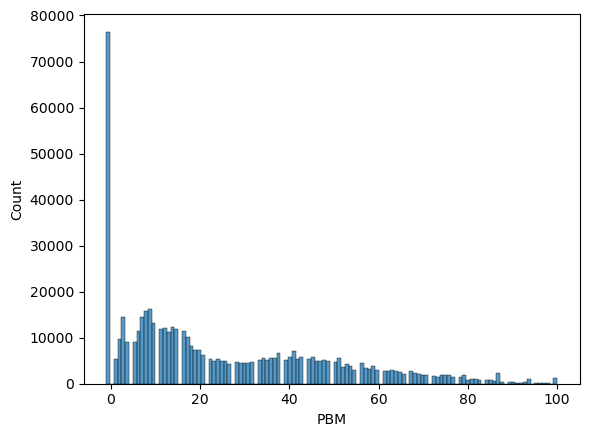

In [67]:
sns.histplot(data=matriculados,x="PBM")

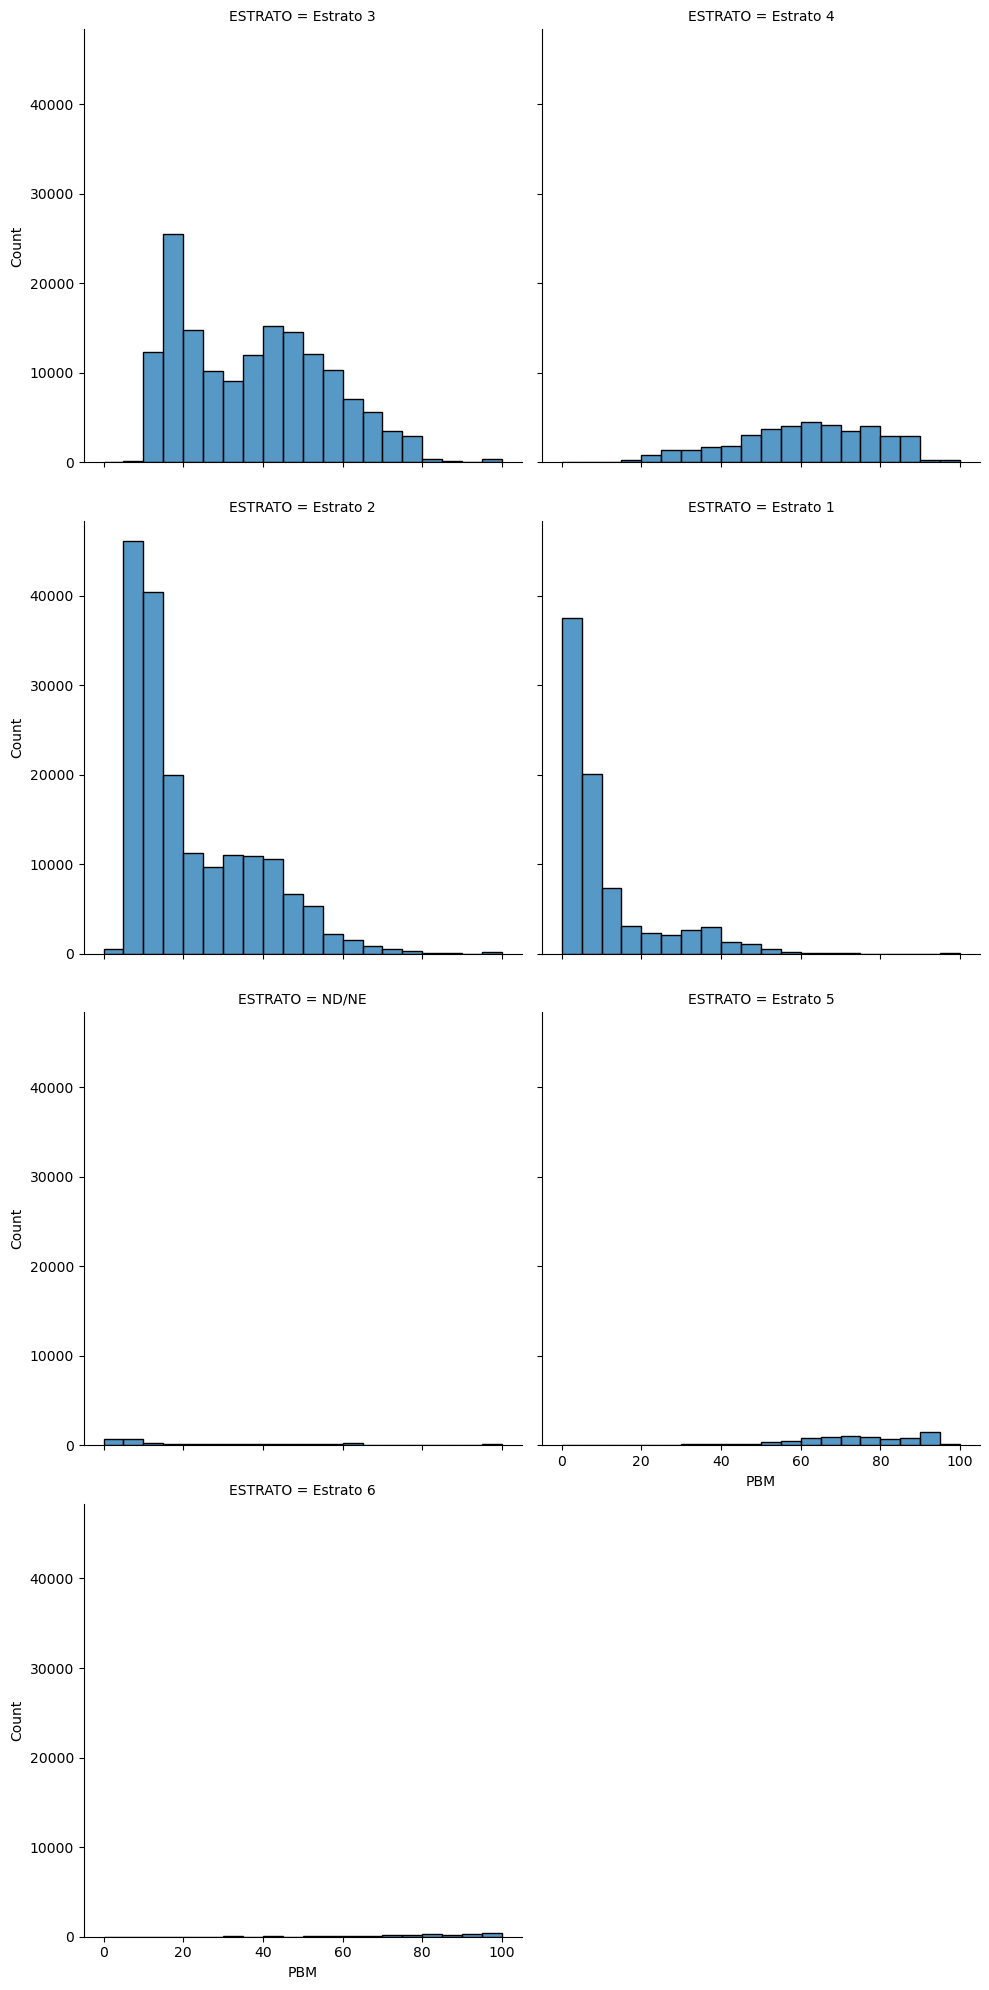

In [11]:
sns.displot(data=pbmplus,x="PBM",bins=20,col="ESTRATO",col_wrap=2)

hay 76,472 datos

In [69]:
matriculados[matriculados["PBM"]==-1].shape[0]

76472

In [71]:
matriculados['PBM'].describe()

count    548189.000000
mean         25.236021
std          23.376670
min          -1.000000
25%           7.000000
50%          17.000000
75%          42.000000
max         100.000000
Name: PBM, dtype: float64

In [72]:
matriculados.describe()

,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_PROC,LAT_CIU_PROC,EDAD,PBM,SNIES_PROGRA,CA_CINE,CD_CINE
count,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000
mean,2021.045678,1.509507,-74.869924,3.965193,-74.779363,4.390373,23.502912,25.236021,13892.711975,5.871428,595.454376
std,1.411652,0.499910,2.027855,9.937489,1.779136,7.458334,5.567344,23.376670,28139.230410,2.193098,235.013162
min,2019.000000,1.000000,-89.000000,-89.000000,-89.000000,-89.000000,14.000000,-1.000000,1.000000,1.000000,-89.000000
25%,2020.000000,1.000000,-75.577056,4.624575,-75.577056,4.624575,20.000000,7.000000,25.000000,4.000000,413.000000
50%,2021.000000,2.000000,-74.113919,4.624575,-74.113919,4.624575,22.000000,17.000000,123.000000,7.000000,711.000000
75%,2022.000000,2.000000,-74.113919,5.780489,-74.113919,5.724862,25.000000,42.000000,16915.000000,7.000000,732.000000
max,2023.000000,2.000000,-67.344905,13.370124,-67.485596,13.370124,79.000000,100.000000,110738.000000,9.000000,929.000000


Pasar valor menores a -89 y -88 a -1 y -2

### Ciudad de Nacimiento

In [11]:
matriculados.describe()

,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_PROC,LAT_CIU_PROC,EDAD,PBM,SNIES_PROGRA,CA_CINE,CD_CINE
count,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000,548189.000000
mean,2021.045678,1.509507,-74.869924,3.965193,-74.779363,4.390373,23.502912,13.099533,13892.711975,5.871428,595.454376
std,1.411652,0.499910,2.027855,9.937489,1.779136,7.458334,5.567344,45.737096,28139.230410,2.193098,235.013162
min,2019.000000,1.000000,-89.000000,-89.000000,-89.000000,-89.000000,14.000000,-89.000000,1.000000,1.000000,-89.000000
25%,2020.000000,1.000000,-75.577056,4.624575,-75.577056,4.624575,20.000000,7.000000,25.000000,4.000000,413.000000
50%,2021.000000,2.000000,-74.113919,4.624575,-74.113919,4.624575,22.000000,17.000000,123.000000,7.000000,711.000000
75%,2022.000000,2.000000,-74.113919,5.780489,-74.113919,5.724862,25.000000,42.000000,16915.000000,7.000000,732.000000
max,2023.000000,2.000000,-67.344905,13.370124,-67.485596,13.370124,79.000000,100.000000,110738.000000,9.000000,929.000000


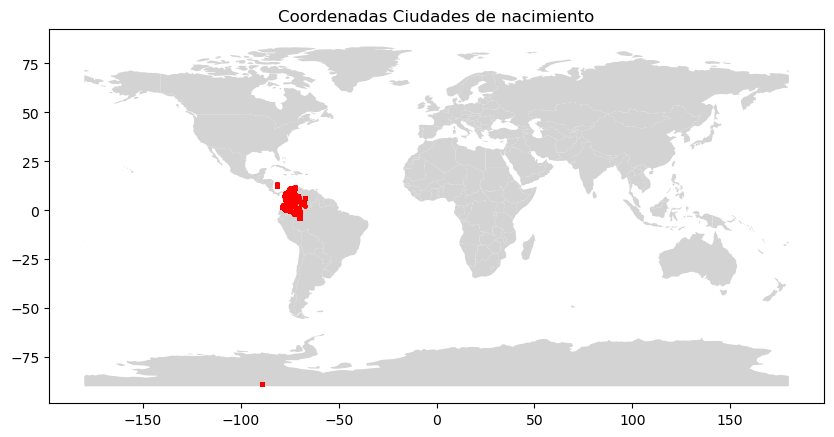

In [6]:
geometry = [Point(xy) for xy in zip(matriculados['LON_CIU_NAC'], matriculados['LAT_CIU_NAC'])]
gdf = gpd.GeoDataFrame(matriculados, geometry=geometry)

# Descargar un mapa base (puedes usar un shapefile o un GeoDataFrame global)
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Graficar
ax = world.plot(color='lightgrey', figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=5)
plt.title("Coordenadas Ciudades de nacimiento")
plt.show()

hay un punto en el polo sur ???
busquemoslo en la base
Toca con mayor que 85 pues de lo contrario se eliminarian tambien los datos de San Andres

In [40]:
sinExtremosSur = matriculados[matriculados['LON_CIU_NAC'] >= -85]
print(sinExtremosSur.shape[0])

542230


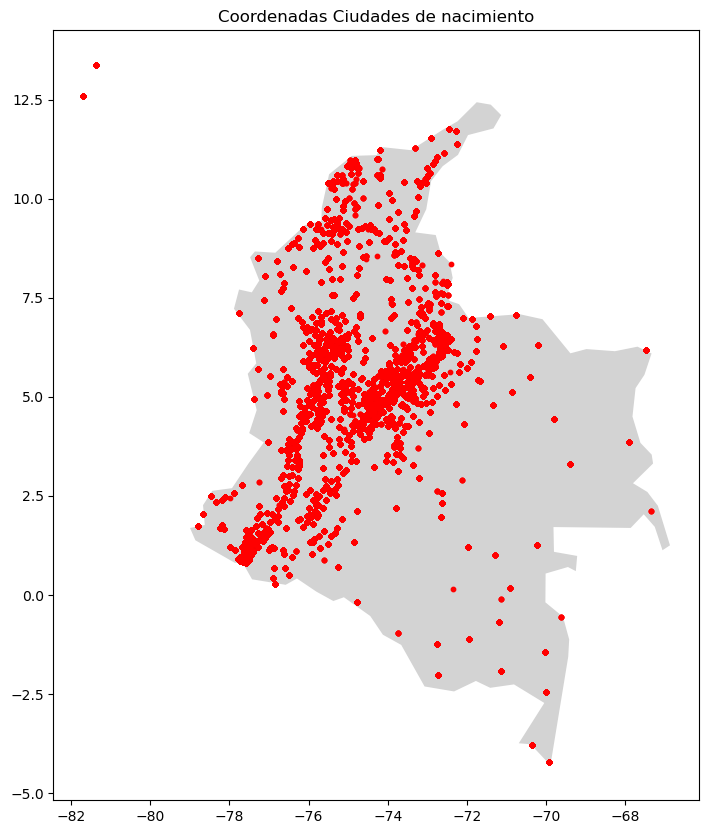

In [48]:
geometry = [Point(xy) for xy in zip(sinExtremosSur['LON_CIU_NAC'], sinExtremosSur['LAT_CIU_NAC'])]
gdf = gpd.GeoDataFrame(sinExtremosSur, geometry=geometry)

# Descargar un mapa base (puedes usar un shapefile o un GeoDataFrame global)
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
colombia = world[world['NAME'] == 'Colombia']

# Graficar
ax = colombia.plot(color='lightgrey', figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=10)
plt.title("Coordenadas Ciudades de nacimiento")
plt.show()

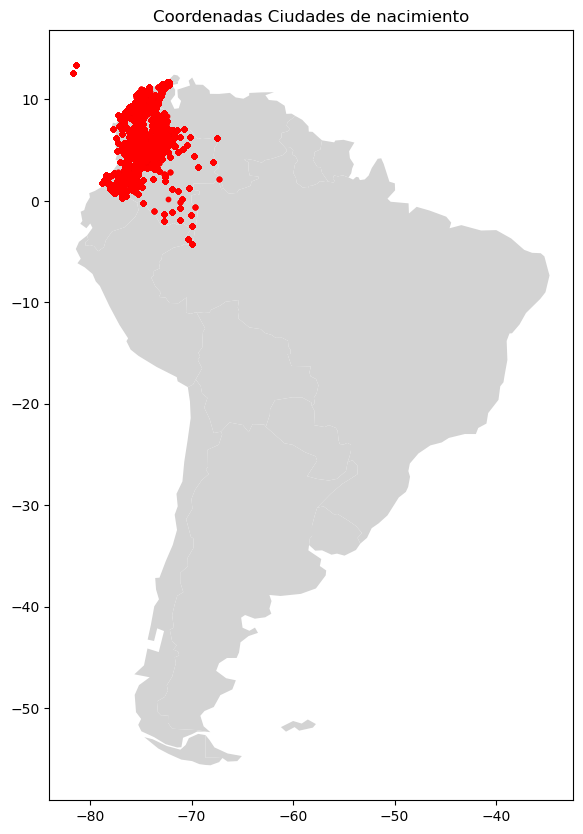

In [47]:
south_america = world[world['CONTINENT'] == 'South America']
ax = south_america.plot(color='lightgrey', figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=10)
plt.title("Coordenadas Ciudades de nacimiento")
plt.show()

In [9]:
matriculados["Segmento"] = pd.cut(matriculados["LON_CIU_NAC"], bins=[float("-inf"), -85, float("inf")], labels=["Extraño", "≥ -85"])


In [10]:
pd.crosstab(matriculados["NACIONALIDAD"],matriculados["Segmento"])

Segmento,Extraño,≥ -85
NACIONALIDAD,,
Colombiana,432,542228
Extranjero,5277,20
Sin información,255,0


Se propone eliminar todos los sin informacion pues solo son 255

In [79]:
matriculados[((matriculados["NACIONALIDAD"]=="Sin información") & (matriculados["LON_CIU_NAC"]<-85))]

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_PROC,CIU_PROC,...,MOV_PEAMA,CONVENIO,TIP_CONVENIO,FACULTAD,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE
85,2019,1,Pregrado,Pregrado,Sin información,Sin información,-89.0,-89.0,TOLIMA,IBAGUÉ,...,No aplica,No aplica,No aplica,Ingeniería,16939,Ingeniería mecatrónica,"Ingeniería, arquitectura, urbanismo y afines",7,715,"Ingeniería, industria y construcción"
6928,2019,1,Pregrado,Pregrado,Sin información,Sin información,-89.0,-89.0,ARAUCA,ARAUQUITA,...,Etapa de movilidad,No aplica,No aplica,Ciencias,34,Geología,Matemáticas y ciencias naturales,5,532,"Ciencias naturales, matemáticas y estadística"
9432,2019,1,Pregrado,Pregrado,Sin información,Sin información,-89.0,-89.0,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No aplica,No aplica,Artes,3101,Música instrumental,Bellas artes,2,215,Artes y humanidades
15999,2019,1,Pregrado,Pregrado,Sin información,Sin información,-89.0,-89.0,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No aplica,No aplica,Artes,2497,Artes plásticas,Bellas artes,2,213,Artes y humanidades
41606,2019,1,Pregrado,Pregrado,Sin información,Sin información,-89.0,-89.0,ANTIOQUIA,MEDELLÍN,...,No aplica,No aplica,No aplica,Ciencias humanas y económicas,115,Historia,Ciencias sociales y humanas,2,222,Artes y humanidades
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545484,2023,2,Postgrado,Especialidades médicas,Sin información,Sin información,-89.0,-89.0,Sin información,Sin información,...,No aplica,No,No aplica,Odontología,3992,Rehabilitación Oral,Ciencias de la salud,9,911,Salud y bienestar
545928,2023,2,Postgrado,Maestría,Sin información,Sin información,-89.0,-89.0,Sin información,Sin información,...,No aplica,No,No aplica,Medicina,19918,Infecciones y Salud el Trópico,Ciencias de la salud,9,912,Salud y bienestar
546389,2023,2,Postgrado,Especialidades médicas,Sin información,Sin información,-89.0,-89.0,VALLE DEL CAUCA,JAMUNDÍ,...,No aplica,No,No aplica,Medicina veterinaria y de zootecnia,16943,Anatomopatología Veterinaria,"Agronomía, veterinaria y afines",8,841,"Agricultura, silvicultura, pesca y veterinaria"
546691,2023,2,Postgrado,Maestría,Sin información,Sin información,-89.0,-89.0,Sin información,Sin información,...,No aplica,No,No aplica,Medicina,52980,Medicina Alternativa,Ciencias de la salud,9,912,Salud y bienestar


In [7]:
matriculados[~( # se niega la condicion anterior
                (matriculados["NACIONALIDAD"]=="Sin información") &
                (matriculados["LON_CIU_NAC"]<-85)
                )]

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_PROC,CIU_PROC,...,MOV_PEAMA,CONVENIO,TIP_CONVENIO,FACULTAD,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE
0,2019,1,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No aplica,No aplica,Ingeniería,24,Ingeniería agrícola,"Ingeniería, arquitectura, urbanismo y afines",8,811,"Agricultura, silvicultura, pesca y veterinaria"
1,2019,1,Pregrado,Pregrado,CUNDINAMARCA,FACATATIVÁ,-74.351015,4.812242,CUNDINAMARCA,FACATATIVÁ,...,No aplica,No aplica,No aplica,"Derecho, ciencias políticas y sociales",17,Derecho,Ciencias sociales y humanas,4,421,Administración de empresas y derecho
2,2019,1,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No aplica,No aplica,"Derecho, ciencias políticas y sociales",17,Derecho,Ciencias sociales y humanas,4,421,Administración de empresas y derecho
3,2019,1,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No aplica,No aplica,Ciencias económicas,18,Economía,"Economía, administración, contaduría y afines",3,311,"Ciencias sociales, periodismo e información"
4,2019,1,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No aplica,No aplica,Ciencias económicas,18,Economía,"Economía, administración, contaduría y afines",3,311,"Ciencias sociales, periodismo e información"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548208,2023,2,Pregrado,Pregrado,NARIÑO,CUMBAL,-77.791242,0.906451,NARIÑO,CUMBAL,...,No aplica,No aplica,No aplica,Medicina,9,Medicina,Ciencias de la salud,9,912,Salud y bienestar
548209,2023,2,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,VALLE DEL CAUCA,JAMUNDÍ,...,No aplica,No aplica,No aplica,Medicina veterinaria y de zootecnia,2,Medicina Veterinaria,"Agronomía, veterinaria y afines",8,841,"Agricultura, silvicultura, pesca y veterinaria"
548210,2023,2,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No aplica,No aplica,Medicina veterinaria y de zootecnia,2,Medicina Veterinaria,"Agronomía, veterinaria y afines",8,841,"Agricultura, silvicultura, pesca y veterinaria"
548211,2023,2,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",...,No aplica,No aplica,No aplica,Ciencias agrarias,1,Ingeniería Agronómica,"Ingeniería, arquitectura, urbanismo y afines",8,811,"Agricultura, silvicultura, pesca y veterinaria"


In [8]:
matriculados = matriculados[~(
                (matriculados["NACIONALIDAD"]=="Sin información") &
                (matriculados["LON_CIU_NAC"]<-85)
                )]

In [9]:
matriculados.describe()

,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_PROC,LAT_CIU_PROC,EDAD,PBM,SNIES_PROGRA,CA_CINE,CD_CINE
count,547934.000000,547934.000000,547934.000000,547934.000000,547934.000000,547934.000000,547934.000000,547934.000000,547934.000000,547934.000000,547934.000000
mean,2021.045307,1.509479,-74.863348,4.008457,-74.777334,4.405035,23.499135,25.246730,13877.026514,5.871963,595.498107
std,1.411641,0.499911,2.005280,9.735280,1.770348,7.366523,5.563153,23.374998,28124.279432,2.192800,234.998931
min,2019.000000,1.000000,-89.000000,-89.000000,-89.000000,-89.000000,14.000000,-1.000000,1.000000,1.000000,-89.000000
25%,2020.000000,1.000000,-75.577056,4.624575,-75.577056,4.624575,20.000000,7.000000,25.000000,4.000000,413.000000
50%,2021.000000,2.000000,-74.113919,4.624575,-74.113919,4.624575,22.000000,17.000000,123.000000,7.000000,711.000000
75%,2022.000000,2.000000,-74.113919,5.780489,-74.113919,5.724862,25.000000,42.000000,16914.000000,7.000000,732.000000
max,2023.000000,2.000000,-67.344905,13.370124,-67.485596,13.370124,79.000000,100.000000,110738.000000,9.000000,929.000000


Para verificar se hace un analisis con la latitud, en este caso hay que tener cuidado con los valores que corresponden a San Andres

In [12]:
matriculados["Segmento"] = pd.cut(matriculados["LAT_CIU_NAC"], bins=[float("-inf"), -10, float("inf")], labels=["Extraño", "≥ -85"])


In [13]:
pd.crosstab(matriculados["NACIONALIDAD"],matriculados["Segmento"])

Segmento,Extraño,≥ -85
NACIONALIDAD,,
Colombiana,428,542210
Extranjero,5276,20


esta correcto

In [9]:
matriculados.to_csv('Matriculados_mod1.csv', index=False)

# Analisis preliminar con base reducida

In [40]:
matriculados = pd.read_csv("Matriculados_mod1.csv")

## datos cuantitaivos

In [8]:
matQuan = matriculados.select_dtypes(include=["number"])
matQuan

,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_PROC,LAT_CIU_PROC,EDAD,PBM,SNIES_PROGRA,CA_CINE,CD_CINE
0,2019,1,-74.113919,4.624575,-74.113919,4.624575,46,11,24,8,811
1,2019,1,-74.351015,4.812242,-74.351015,4.812242,27,23,17,4,421
2,2019,1,-74.113919,4.624575,-74.113919,4.624575,29,18,17,4,421
3,2019,1,-74.113919,4.624575,-74.113919,4.624575,24,70,18,3,311
4,2019,1,-74.113919,4.624575,-74.113919,4.624575,24,12,18,3,311
...,...,...,...,...,...,...,...,...,...,...,...
548208,2023,2,-77.791242,0.906451,-77.791242,0.906451,20,2,9,9,912
548209,2023,2,-74.113919,4.624575,-76.538810,3.264186,23,7,2,8,841
548210,2023,2,-74.113919,4.624575,-74.113919,4.624575,22,49,2,8,841
548211,2023,2,-74.113919,4.624575,-74.113919,4.624575,18,17,1,8,811


son 11 columnas

es mejor separar las geograficas

In [13]:
matGeo = matQuan[["LON_CIU_NAC","LAT_CIU_NAC","LON_CIU_PROC","LAT_CIU_PROC"]]
matGeo

,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_PROC,LAT_CIU_PROC
0,-74.113919,4.624575,-74.113919,4.624575
1,-74.351015,4.812242,-74.351015,4.812242
2,-74.113919,4.624575,-74.113919,4.624575
3,-74.113919,4.624575,-74.113919,4.624575
4,-74.113919,4.624575,-74.113919,4.624575
...,...,...,...,...
548208,-77.791242,0.906451,-77.791242,0.906451
548209,-74.113919,4.624575,-76.538810,3.264186
548210,-74.113919,4.624575,-74.113919,4.624575
548211,-74.113919,4.624575,-74.113919,4.624575


In [14]:
matQuan = matQuan.drop(columns=matGeo.columns)

In [15]:
matQuan

,YEAR,SEMESTRE,EDAD,PBM,SNIES_PROGRA,CA_CINE,CD_CINE
0,2019,1,46,11,24,8,811
1,2019,1,27,23,17,4,421
2,2019,1,29,18,17,4,421
3,2019,1,24,70,18,3,311
4,2019,1,24,12,18,3,311
...,...,...,...,...,...,...,...
548208,2023,2,20,2,9,9,912
548209,2023,2,23,7,2,8,841
548210,2023,2,22,49,2,8,841
548211,2023,2,18,17,1,8,811


## datos cualitativos

In [11]:
matQual = matriculados.select_dtypes(include=["object"])
matQual

,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,DEP_PROC,CIU_PROC,CODS_NAC,NACIONALIDAD,SEXO,ESTRATO,...,TIPO_ADM,PAES,PEAMA,MOV_PEAMA,CONVENIO,TIP_CONVENIO,FACULTAD,PROGRAMA,AREAC_SNIES,AREA_CINE
0,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.","BOGOTÁ, D. C.","BOGOTÁ, D.C.",COL,Colombiana,Hombres,Estrato 3,...,Regular,No aplica,No aplica,No aplica,No aplica,No aplica,Ingeniería,Ingeniería agrícola,"Ingeniería, arquitectura, urbanismo y afines","Agricultura, silvicultura, pesca y veterinaria"
1,Pregrado,Pregrado,CUNDINAMARCA,FACATATIVÁ,CUNDINAMARCA,FACATATIVÁ,COL,Colombiana,Mujeres,Estrato 4,...,Regular,No aplica,No aplica,No aplica,No aplica,No aplica,"Derecho, ciencias políticas y sociales",Derecho,Ciencias sociales y humanas,Administración de empresas y derecho
2,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.","BOGOTÁ, D. C.","BOGOTÁ, D.C.",COL,Colombiana,Hombres,Estrato 3,...,Regular,No aplica,No aplica,No aplica,No aplica,No aplica,"Derecho, ciencias políticas y sociales",Derecho,Ciencias sociales y humanas,Administración de empresas y derecho
3,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.","BOGOTÁ, D. C.","BOGOTÁ, D.C.",COL,Colombiana,Mujeres,Estrato 3,...,Regular,No aplica,No aplica,No aplica,No aplica,No aplica,Ciencias económicas,Economía,"Economía, administración, contaduría y afines","Ciencias sociales, periodismo e información"
4,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.","BOGOTÁ, D. C.","BOGOTÁ, D.C.",COL,Colombiana,Hombres,Estrato 2,...,Regular,No aplica,No aplica,No aplica,No aplica,No aplica,Ciencias económicas,Economía,"Economía, administración, contaduría y afines","Ciencias sociales, periodismo e información"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548208,Pregrado,Pregrado,NARIÑO,CUMBAL,NARIÑO,CUMBAL,COL,Colombiana,Hombres,Estrato 1,...,PAES,Comunidades indígenas,No aplica,No aplica,No aplica,No aplica,Medicina,Medicina,Ciencias de la salud,Salud y bienestar
548209,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",VALLE DEL CAUCA,JAMUNDÍ,COL,Colombiana,Mujeres,Estrato 2,...,PAES,Victimas del conflicto armado interno en Colombia,No aplica,No aplica,No aplica,No aplica,Medicina veterinaria y de zootecnia,Medicina Veterinaria,"Agronomía, veterinaria y afines","Agricultura, silvicultura, pesca y veterinaria"
548210,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.","BOGOTÁ, D. C.","BOGOTÁ, D.C.",COL,Colombiana,Mujeres,Estrato 2,...,Regular,No aplica,No aplica,No aplica,No aplica,No aplica,Medicina veterinaria y de zootecnia,Medicina Veterinaria,"Agronomía, veterinaria y afines","Agricultura, silvicultura, pesca y veterinaria"
548211,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.","BOGOTÁ, D. C.","BOGOTÁ, D.C.",COL,Colombiana,Hombres,Estrato 2,...,Regular,No aplica,No aplica,No aplica,No aplica,No aplica,Ciencias agrarias,Ingeniería Agronómica,"Ingeniería, arquitectura, urbanismo y afines","Agricultura, silvicultura, pesca y veterinaria"


In [17]:
matQual.nunique().sort_values()

TIPO_NIVEL            2
SEXO                  2
MAT_PVEZ              2
TIP_CONVENIO          3
CONVENIO              3
MOV_PEAMA             3
NACIONALIDAD          3
TIPO_ADM              3
TIPO_COL              4
NIVEL                 5
ADM_PEAMA_ANDINA      5
PAES                  7
ESTRATO               7
PEAMA                 8
AREAC_SNIES           8
SEDE_NOMBRE_ADM       9
SEDE_NOMBRE_MAT       9
AREA_CINE             9
FACULTAD             22
DEP_PROC             34
DEP_NAC              34
CODS_NAC             50
PROGRAMA            521
CIU_PROC            900
CIU_NAC             951
dtype: int64

## Analisis Geografico

# MISC

In [ ]:
sns.histplot(data=)

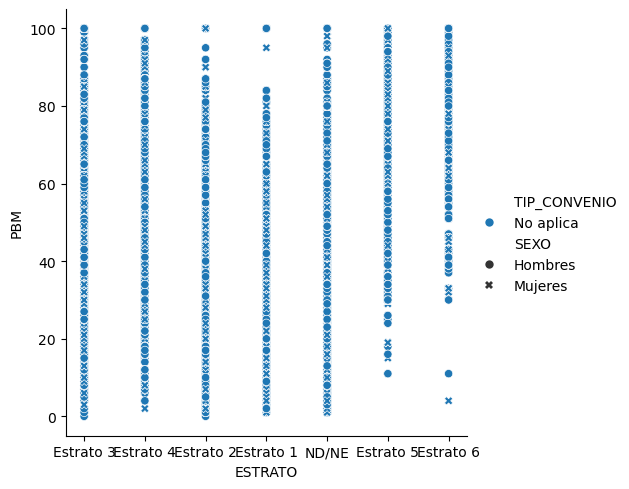

In [20]:
sns.relplot(
    data=pmbplus, x="ESTRATO", y="PBM",#,kind="line" #col="SEXO",
    hue="TIP_CONVENIO", style="SEXO", #size=10,
    #sizes=(10, 100)
)

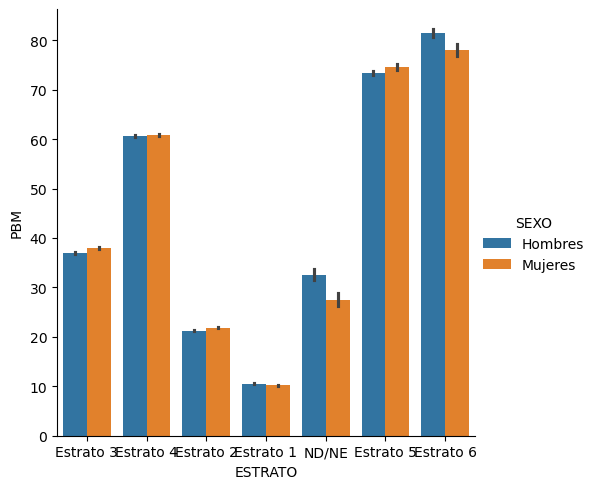

In [24]:
sns.catplot(data=pmbplus, kind="bar", x="ESTRATO", y="PBM", hue="SEXO")

In [8]:
sns.relplot(
    data=matriculados, x="ESTRATO", y="PBM",kind="line" #col="SEXO",
    hue="TIP_CONVENIO", style="SEXO", #size=10,
    #sizes=(10, 100)
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1562263776.py, line 2)

In [44]:
#ruta = "Carto100000_Colombia_DI_2022_shp/Limite_Municipal_Poligono.shp"
ruta = "Carto100000_Colombia_DI_2022_shp/Limite_Departamental.shp"

# Descargar un mapa base (puedes usar un shapefile o un GeoDataFrame global)
ColombiaIGAC = gpd.read_file(ruta)
#ax = ColombiaIGAC.plot(color='lightgrey', figsize=(10, 10))


In [35]:
ColombiaIGAC.crs

<Projected CRS: PROJCS["MAGNA-SIRGAS_Origen-Nacional",GEOGCS["MAGN ...>
Name: MAGNA-SIRGAS_Origen-Nacional
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [45]:
colombiaLatLon = ColombiaIGAC.to_crs("EPSG:4326")


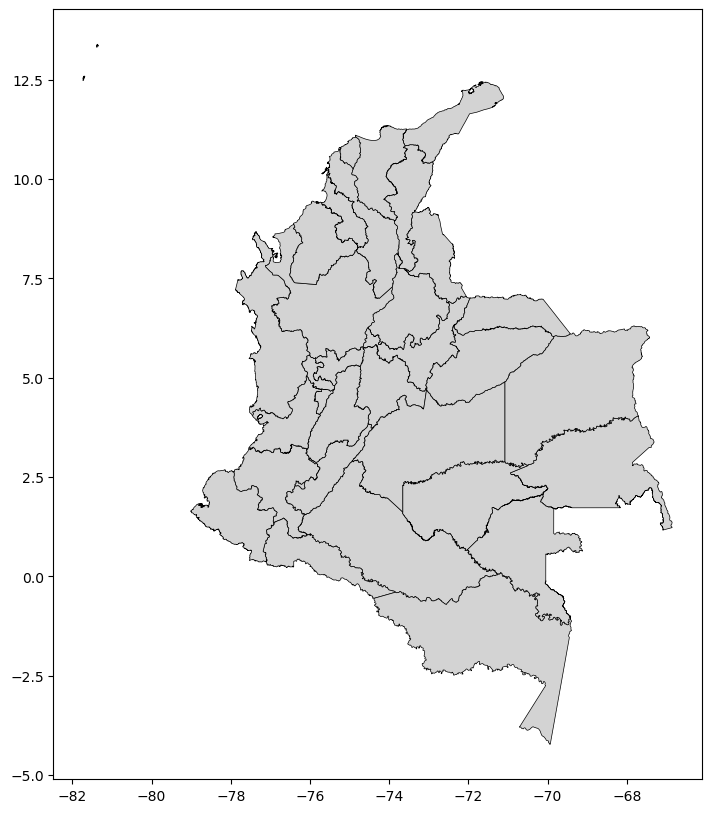

In [48]:
ax = colombiaLatLon.plot(color='lightgrey', figsize=(10, 10), edgecolor="black", linewidth=0.5)

observe el cambio de coordenadas

In [49]:
sinExtremosSur = matriculados[matriculados['LON_CIU_NAC'] >= -85]
print(sinExtremosSur.shape[0])

542230


In [50]:
geometry = [Point(xy) for xy in zip(sinExtremosSur['LON_CIU_NAC'], sinExtremosSur['LAT_CIU_NAC'])]
gdf = gpd.GeoDataFrame(sinExtremosSur, geometry=geometry)

Text(0.5, 1.0, 'Coordenadas Ciudades de nacimiento')

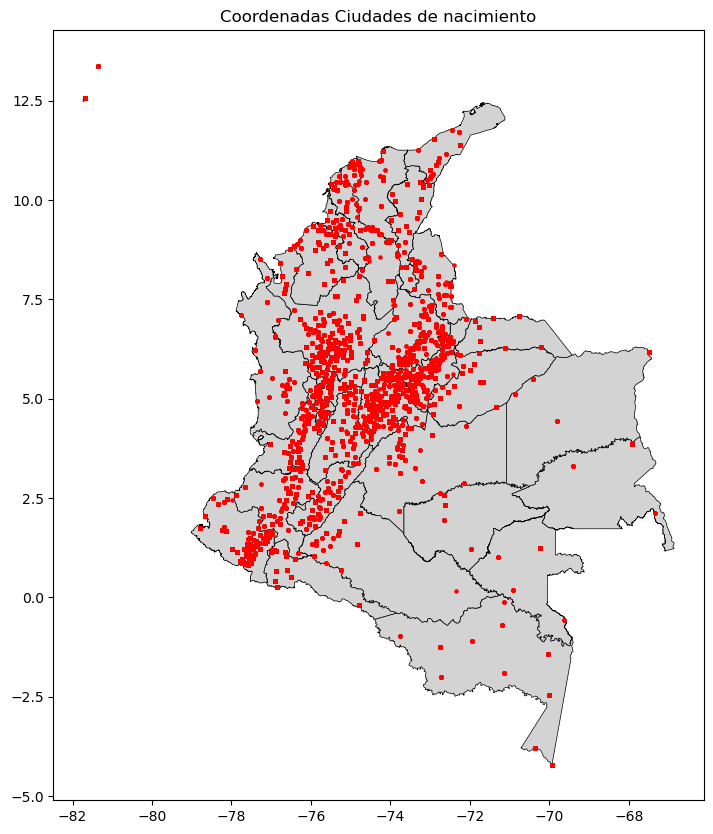

In [55]:
ax = colombiaLatLon.plot(color='lightgrey', figsize=(10, 10), edgecolor="black", linewidth=0.5)
gdf.plot(ax=ax, color='red', markersize=5)
plt.title("Coordenadas Ciudades de nacimiento")

<AxesSubplot:>

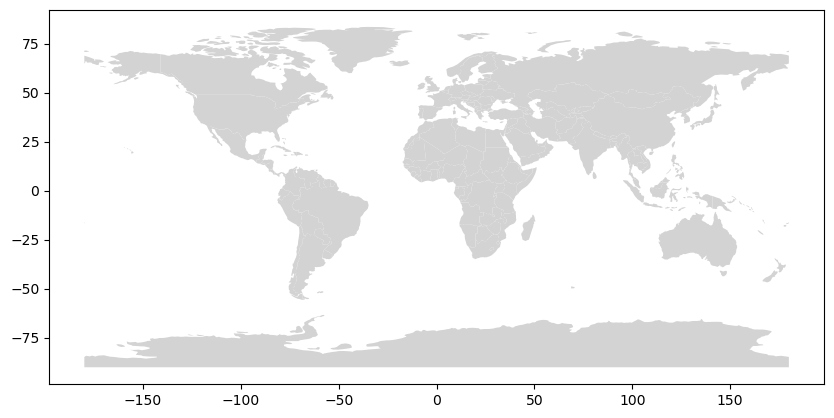

In [52]:
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
world.plot(color='lightgrey', figsize=(10, 10))

In [53]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich